# Porosity and density distribution for sandstone,shale and dolomite 

# Porosity

Porosity is a measure of pore space in a rock, and is a fraction of the volume of voids over the total volume. The porosity of a rock depends on many factors, including the rock type (lithology) and how the grains of a rock are arranged.

Porosity= ɸ = (Vp ÷ Vb) × 100, where; Vp = pore volume Vb = bulk volume of rock.

Porosity (ɸ) is shown in percentage form or in fraction

# Density

Density is defined as the mass per volume.

# Density in rocks

In rocks, it is a function of the densities of the individual grains, the porosity, and the fluid filling the pores. There are three types of density in rocks: dry density, wet density, and grain density.

Dry density is measured on rocks without any water or fluid in their pores.

Wet density is measured on fully saturated cores.

Grain density describes the density of solid or mineral grains of the rock.


Source of data: https://wgnhs.wisc.edu/maps-data/data/rock-properties/porosity-density-measurements-data/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'Documents\core data.xlsx',usecols='E:J')
df.head()

,Lithology,Depth(ft),Porosity,Dry_density(g/cm3),Wet_density(g/cm3),Grain_density(g/cm3)
0,sandstone,60.1,0.14,2.41,2.54,2.79
1,sandstone,60.2,0.28,1.93,2.21,2.67
2,sandstone,118.3,0.30,1.88,2.18,2.70
3,shale,288.4,0.15,2.29,2.43,2.68
4,shale,295.2,0.12,2.41,2.53,2.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lithology             30 non-null     object 
 1   Depth(ft)             30 non-null     float64
 2   Porosity              30 non-null     float64
 3   Dry_density(g/cm3)    30 non-null     float64
 4   Wet_density(g/cm3)    30 non-null     float64
 5   Grain_density(g/cm3)  30 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


In [4]:
df=df.drop('Depth(ft)',axis=1)
df.head()

,Lithology,Porosity,Dry_density(g/cm3),Wet_density(g/cm3),Grain_density(g/cm3)
0,sandstone,0.14,2.41,2.54,2.79
1,sandstone,0.28,1.93,2.21,2.67
2,sandstone,0.30,1.88,2.18,2.70
3,shale,0.15,2.29,2.43,2.68
4,shale,0.12,2.41,2.53,2.74


In [5]:
df.loc[df.groupby('Lithology').Porosity.agg('idxmax')]

,Lithology,Porosity,Dry_density(g/cm3),Wet_density(g/cm3),Grain_density(g/cm3)
17,dolomite,0.06,2.69,2.75,2.86
2,sandstone,0.30,1.88,2.18,2.70
3,shale,0.15,2.29,2.43,2.68


In [6]:
df.loc[df.groupby('Lithology').Porosity.agg('idxmin')]

,Lithology,Porosity,Dry_density(g/cm3),Wet_density(g/cm3),Grain_density(g/cm3)
25,dolomite,0.02,2.77,2.79,2.83
16,sandstone,0.11,2.35,2.46,2.65
5,shale,0.08,2.57,2.65,2.79


From above two dataframe we concluded the porosities ranges for each lithology.

Dolomites have the lowest porosities (2–6%).

Shales have the widest range of porosities (8–15%).   

Sandstones have the highest porosity (11–32%).

Much of this variation is due to lithology (rock type).

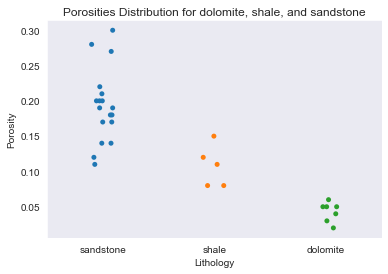

In [7]:
sns.set_style('dark') 
plt.title('Porosities Distribution for dolomite, shale, and sandstone')
sns.stripplot(df.Lithology,df['Porosity'])
plt.show()

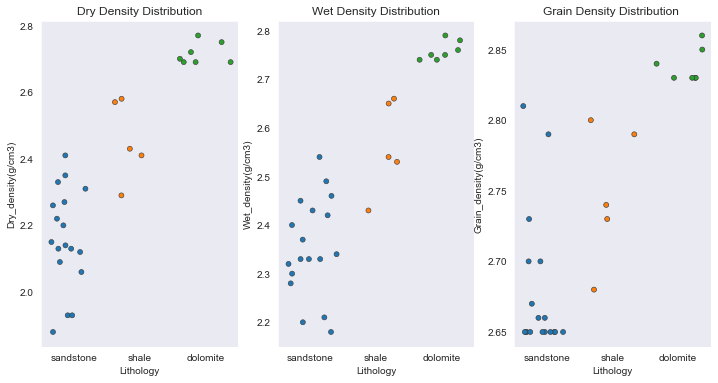

In [8]:
fig, axs=plt.subplots(ncols=3)
fig.set_size_inches(12,6)


axs[0].title.set_text('Dry Density Distribution')
sns.stripplot(df.Lithology,df['Dry_density(g/cm3)'],ax=axs[0],jitter=0.4,linewidth=0.6)

axs[1].title.set_text('Wet Density Distribution')
sns.stripplot(df.Lithology,df['Wet_density(g/cm3)'],ax=axs[1],jitter=0.4,linewidth=0.6)
 
axs[2].title.set_text('Grain Density Distribution ')
sns.stripplot(df.Lithology,df['Grain_density(g/cm3)'],ax=axs[2],jitter=0.4,linewidth=0.65)

plt.show()

A pairs plot allows us to see both distribution of single variables and relationships between two variables, therefore i am using it to visualize how two properties vary with rock type.

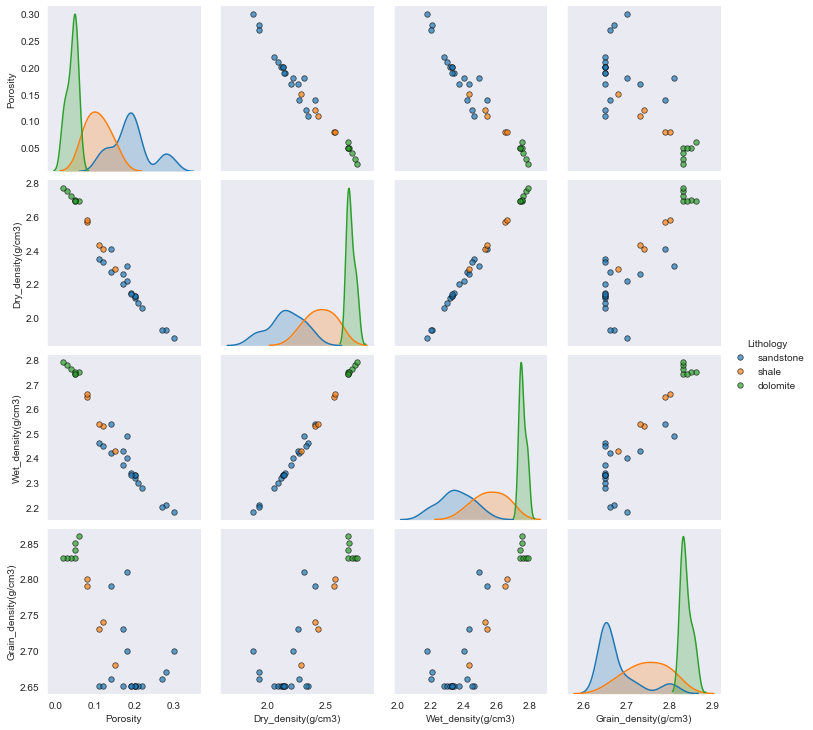

In [9]:
sns.pairplot(df,hue='Lithology',diag_kind='kde',plot_kws={'alpha':0.7,'s':30,'edgecolor':'k'})
plt.show()